# Creando las anotaciones

Antes de realizar el entrenamiento para la detección de las aletas de las ballenas, es necesario hacer las anotaciones indicando cual es el cuadro delimitador o bouding box del objeto en las imágenes de entrenamiento y validación.

## Leyendo las coordenadas

El archivo "cropping.txt" contiene una lista de imágenes con sus respectivas coordenadas que representan puntos en los bordes de la aleta.

Se define una lista de tuplas denominada data. Cada tupla contiene el nombre de la imágen y la lista de coordenadas.

In [1]:
with open('../ssd_keras/datasets/whales/cropping.txt', 'rt') as f: data = f.read().split('\n')[:-1]
data = [line.split(',') for line in data]
data = [(p,[(int(coord[i]),int(coord[i+1])) for i in range(0,len(coord),2)]) for p,*coord in data]

# Mostramos un ejemplo: (nombre de la imagen, [coordenadas])
data[10]

('b0550902.jpg',
 [(47, 121), (53, 102), (928, 44), (1012, 193), (778, 478), (499, 509)])

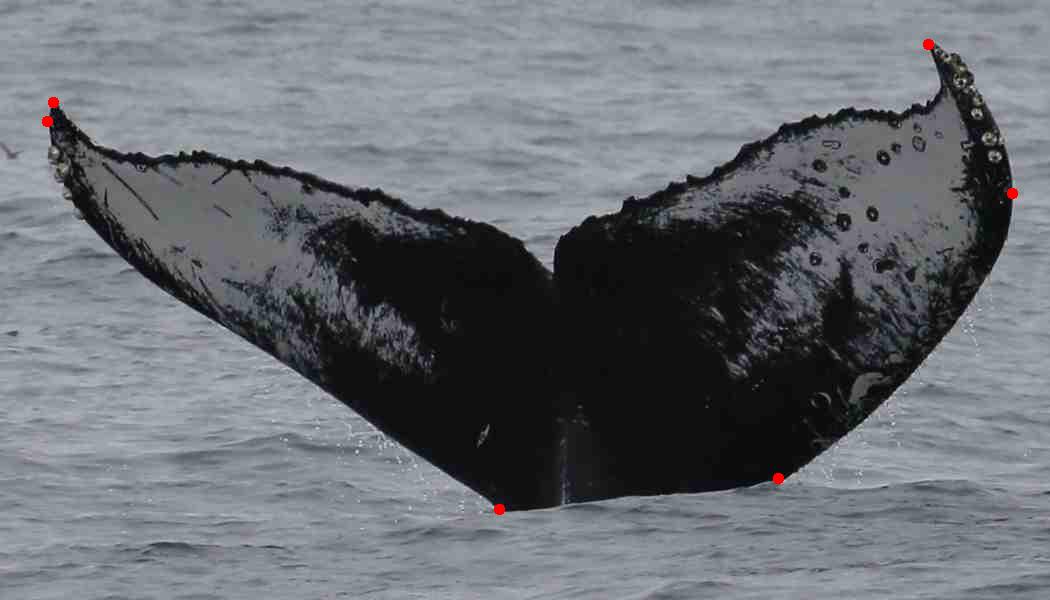

In [2]:
from utils import bounding_rectangle, read_raw_image, draw_dots
from PIL.ImageDraw import Draw

filename,coordinates = data[10]
img = read_raw_image(filename)
draw = Draw(img)
draw_dots(draw, coordinates)
img

# Construyendo bounding-box

Los valores extremos de las coordenadas se pueden usar para construir el cuadro delimitador.

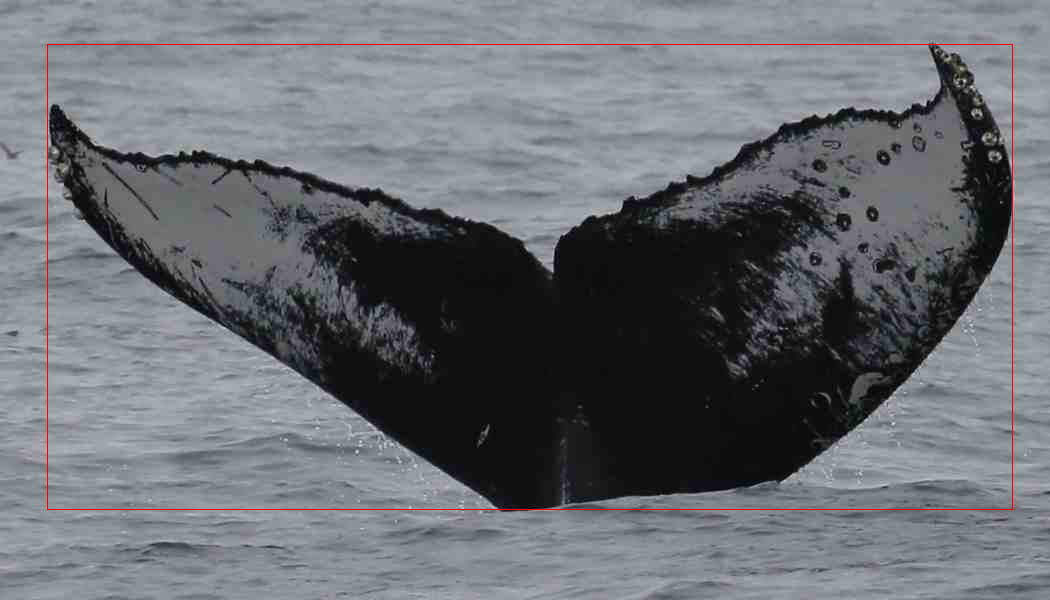

In [3]:
# Mostramos un ejemplo de bounding-box
filename,coordinates = data[10]
box = bounding_rectangle(coordinates)
img = read_raw_image(filename)
draw = Draw(img)
draw.rectangle(box, outline='red')
img

## Guardando la lista de imágenes

Guardamos la lista de nombres de las imágenes sin extensión en un archivo txt.

In [6]:
import os

# Definimos la ruta completa del archivo donde se guardará la lista
whales_trainval_image_set_filename = '../ssd_keras/datasets/whales/trainval.txt'

# creando lista de nombres de las imágenes
files = []
zind = 0
for z in data:
    file,c = data[zind]
    if '.jpg' in file:
        files.append(os.path.splitext(file)[0])
    zind+=1
                
print('Nro. total de imágenes: ', len(files))

# guardamos la lista de nombres en un archivo txt
f = open(whales_trainval_image_set_filename,"w+")
for file in files:
    f.write("%s\r\n" % file)
f.close()


print('Lista guardada en : ' + whales_trainval_image_set_filename)

Nro. total de imágenes:  1200
Lista guardada en : ../ssd_keras/datasets/whales/trainval.txt


## Guardando las anotaciones

Guardamos las anotaciones en el formato XML de Pascal VOC, un archivo xml por cada imagen

In [8]:
# Definimos las ruta donde se guardarna los xmls
whales_annotations_dir = '../ssd_keras/datasets/whales/annotations/'
# Definimos la ruta de donde se obtendran las imágenes
whales_images_dir_trainval = '../ssd_keras/datasets/whales/train/train/'
#whales_images_dir_test = 'datasets/whales/test/test/'

In [12]:
from PIL import Image
from PIL.ImageDraw import Draw
from os.path import isfile
    
# crear anotación en un archivo xml
def make_annotations(data, basedir, sourcedir):
    zind = 0
    for z in data:
        #print(zind)
        filename,coordinates=data[zind]
        #print(filename)
        head, tail = os.path.split(filename)
        basename, file_extension = os.path.splitext(tail)
        annotation_file = basedir + basename + '.xml'
        f = open(annotation_file,'w') 
        line = "<annotation>" + '\n'
        f.write(line)
        line = '\t<folder>' + "folder" + '</folder>' + '\n'
        f.write(line)
        line = '\t<filename>' + tail + '</filename>' + '\n'
        f.write(line)
        line = '\t<source>\n\t\t<database>Source</database>\n\t</source>\n'
        f.write(line)
        im=Image.open(sourcedir + tail)
        (width, height) = im.size
        line = '\t<size>\n\t\t<width>'+ str(width) + '</width>\n\t\t<height>' + str(height) + '</height>\n\t'
        line += '\t<depth>Unspecified</depth>\n\t</size>'
        f.write(line)
        line = '\n\t<segmented>Unspecified</segmented>'
        f.write(line)
        ind = 0
        xmin,ymin,xmax,ymax = bounding_rectangle(coordinates)
        line = '\n\t<object>'
        line += '\n\t\t<name>whale</name>\n\t\t<pose>Unspecified</pose>'
        line += '\n\t\t<truncated>0</truncated>\n\t\t<difficult>0</difficult>'
        line += '\n\t\t<bndbox>\n\t\t\t<xmin>' + str(xmin) + '</xmin>'
        line += '\n\t\t\t<ymin>' + str(ymin) + '</ymin>'
        line += '\n\t\t\t<xmax>' + str(xmax) + '</xmax>'
        line += '\n\t\t\t<ymax>' + str(ymax) + '</ymax>'
        line += '\n\t\t</bndbox>'
        line += '\n\t</object>'
        line += '\n</annotation>'
        f.write(line)
        ind +=1
        f.close()
        zind +=1
    print(zind, "anotaciones creadas en", basedir)
    
# sd
make_annotations(data, whales_annotations_dir, whales_images_dir_trainval)

1200 anotaciones creadas en ../ssd_keras/datasets/whales/annotations/
